In [2]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 02:47:24,947] A new study created in memory with name: no-name-fa6def5e-0fd3-475f-9106-1e0429f5459e
[I 2025-04-27 02:47:25,039] Trial 0 finished with value: 0.968421052631579 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 48, 'p': 2}. Best is trial 0 with value: 0.968421052631579.
[I 2025-04-27 02:47:25,135] Trial 1 finished with value: 0.9552631578947368 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 46, 'p': 2}. Best is trial 0 with value: 0.968421052631579.
[I 2025-04-27 02:47:25,301] Trial 2 finished with value: 0.9605263157894737 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 47, 'p': 2}. Best is trial 0 with value: 0.968421052631579.
[I 2025-04-27 02:47:25,457] Trial 3 finished with value: 0.9578947368421051 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 2}. Best is trial 0 

Best trial:
Accuracy: 0.9763157894736842
Best hyperparameters:  {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 26, 'p': 1}


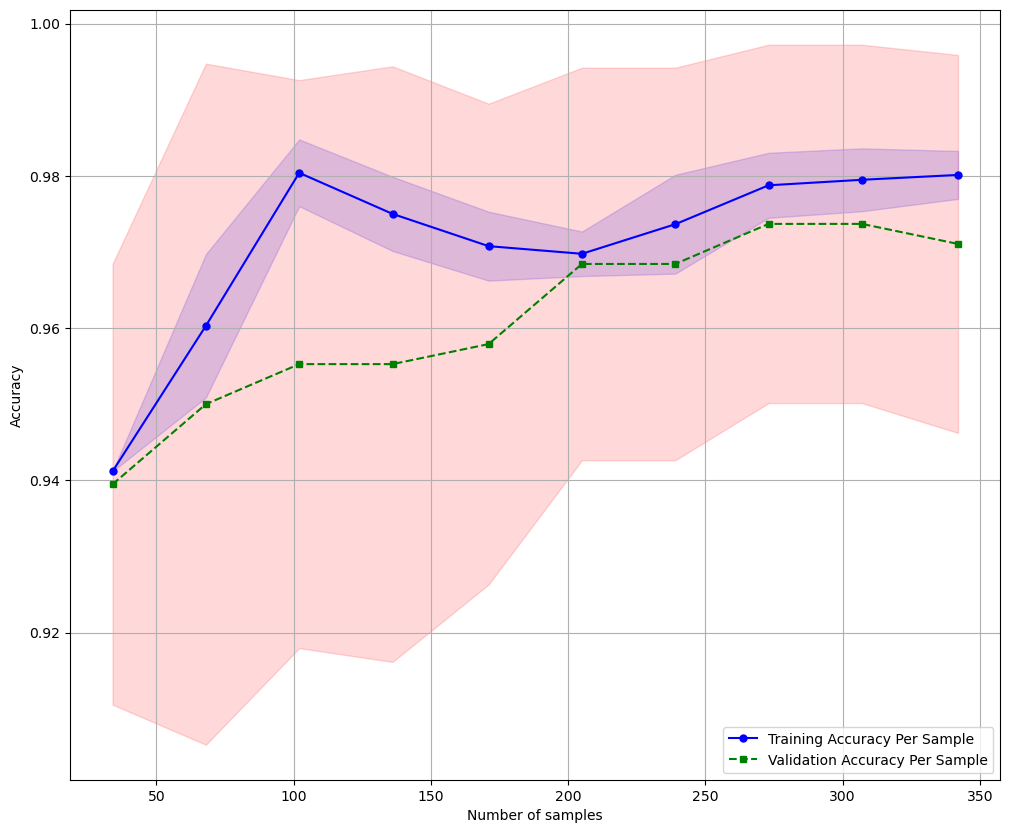

Confusion Matrix
[[ 58   6]
 [  3 104]]
Accuracy: 0.9474, Precision: 0.9455, Recall: 0.9720, F1: 0.9585, AUC:0.9928


In [3]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

helper.train_and_evaluate_model('lr', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)